In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [116]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [117]:
df.shape

(907, 27)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [119]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

IND    907
Name: country, dtype: int64


India    907
Name: country_long, dtype: int64


ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64


WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     

Deleting columns with constant values (either 1 or any other constant value) as they don't provide any useful information for predictive modeling.

In [120]:
# Dropping columns with constant values
df = df.drop(columns=df.columns[df.nunique() == 1], axis=1)

Columns with all null values do not contribute meaningful information to the analysis.

In [121]:
# Deleting columns with all null values
df = df.dropna(axis=1, how='all')

In [122]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   gppd_idnr            907 non-null    object 
 2   capacity_mw          907 non-null    float64
 3   latitude             861 non-null    float64
 4   longitude            861 non-null    float64
 5   primary_fuel         907 non-null    object 
 6   other_fuel1          198 non-null    object 
 7   commissioning_year   527 non-null    float64
 8   owner                342 non-null    object 
 9   source               907 non-null    object 
 10  url                  907 non-null    object 
 11  geolocation_source   888 non-null    object 
 12  generation_gwh_2014  398 non-null    float64
 13  generation_gwh_2015  422 non-null    float64
 14  generation_gwh_2016  434 non-null    float64
 15  generation_gwh_2017  440 non-null    flo

In [124]:
#deleting these columns as they have unique values which may not help in analysis
df.drop(['name','gppd_idnr','owner','url'], axis=1,inplace=True)

In [125]:
# Handling missing values
df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)

df['other_fuel1'].fillna(df['other_fuel1'].mode()[0], inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0], inplace=True)

df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(), inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(), inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(), inplace=True)
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean(), inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2018'].mean(), inplace=True)


In [126]:
# Converting  year column to integers
df['commissioning_year'] = df['commissioning_year'].astype('Int64')  

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          907 non-null    object 
 5   commissioning_year   907 non-null    Int64  
 6   source               907 non-null    object 
 7   geolocation_source   907 non-null    object 
 8   generation_gwh_2014  907 non-null    float64
 9   generation_gwh_2015  907 non-null    float64
 10  generation_gwh_2016  907 non-null    float64
 11  generation_gwh_2017  907 non-null    float64
 12  generation_gwh_2018  907 non-null    float64
dtypes: Int64(1), float64(8), object(4)
memory usage: 93.1+ KB


In [128]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,2011,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2600.804099,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,Oil,2015,Ultratech Cement ltd,WRI,2600.804099,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,Oil,2015,CDM,WRI,2600.804099,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,Oil,2004,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


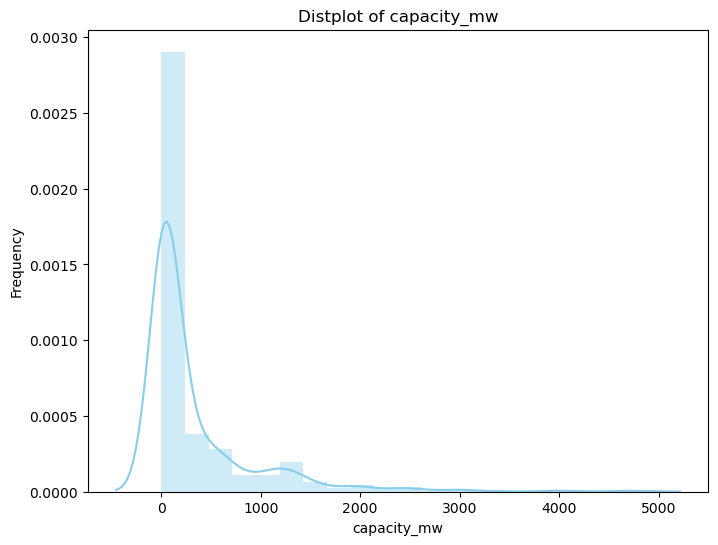

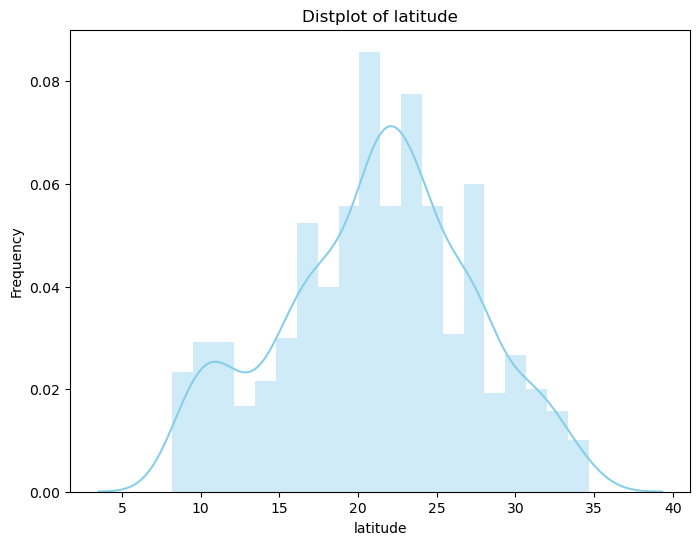

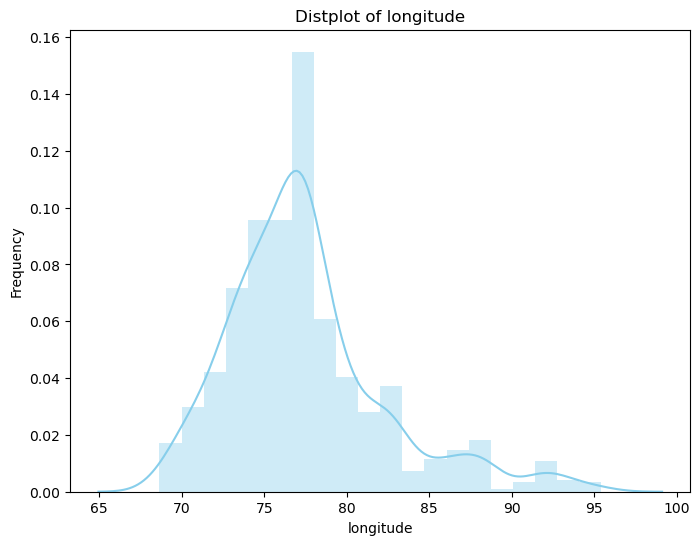

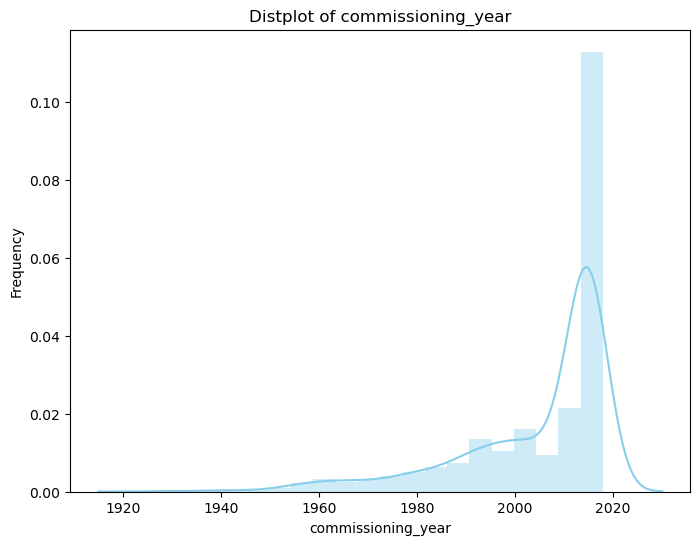

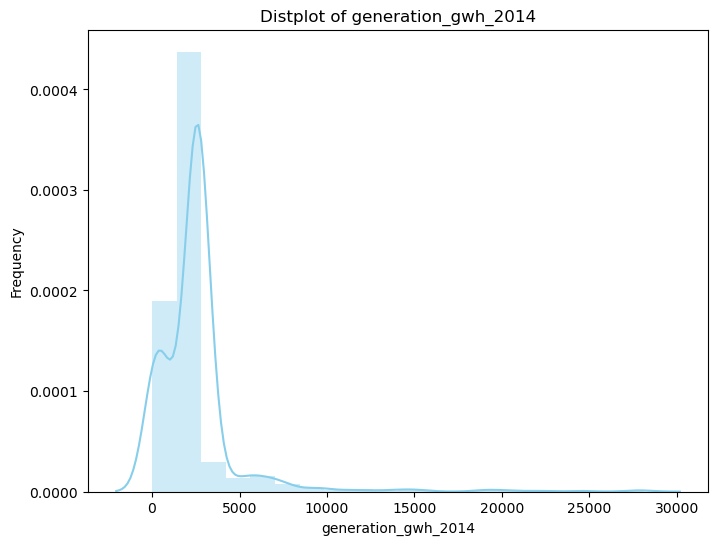

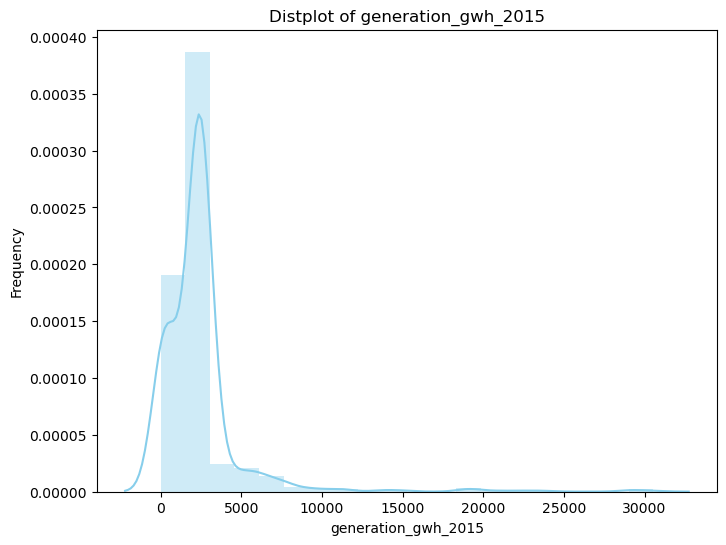

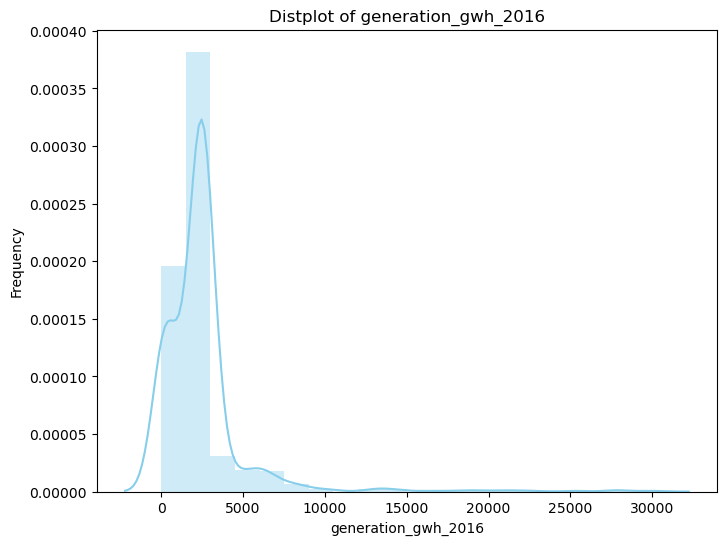

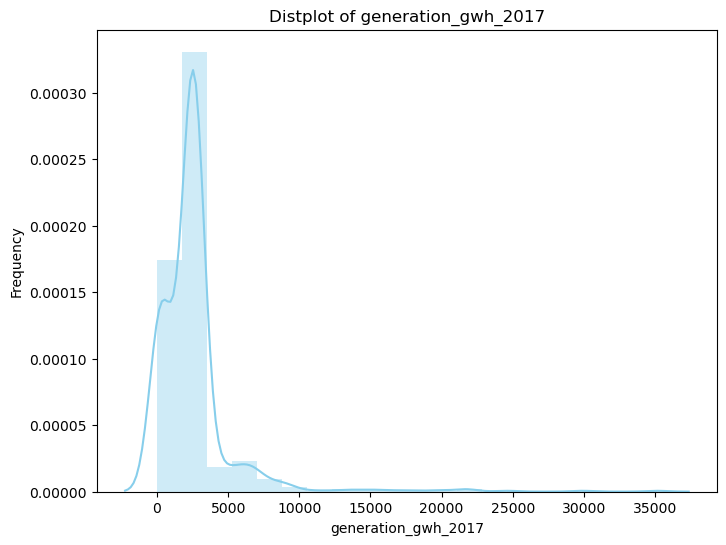

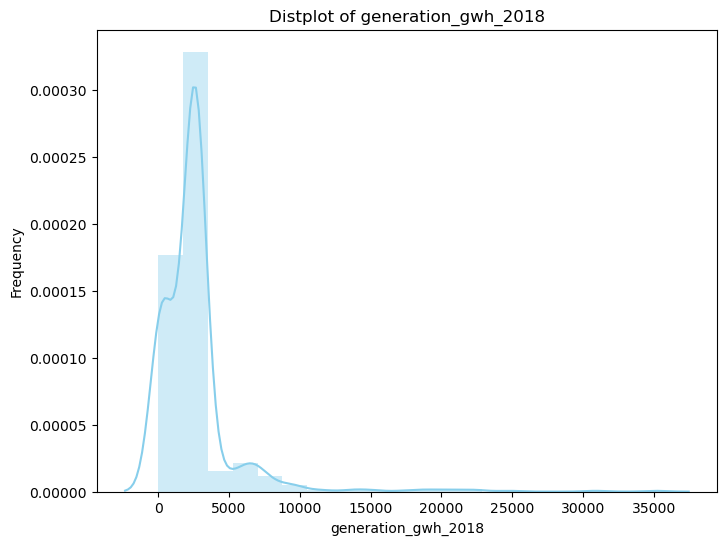

In [129]:
#Univariate analysis

numerical_cols = [
    'capacity_mw', 'latitude', 'longitude', 'commissioning_year',
    'generation_gwh_2014', 'generation_gwh_2015',
    'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
    ]

for column in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.distplot(df[column], bins=20, kde=True, color='skyblue') 
    plt.title(f'Distplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

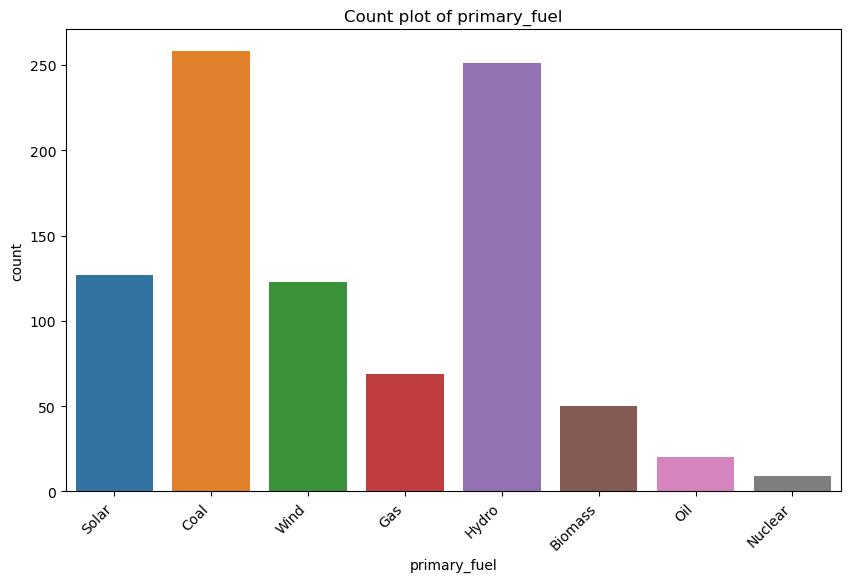

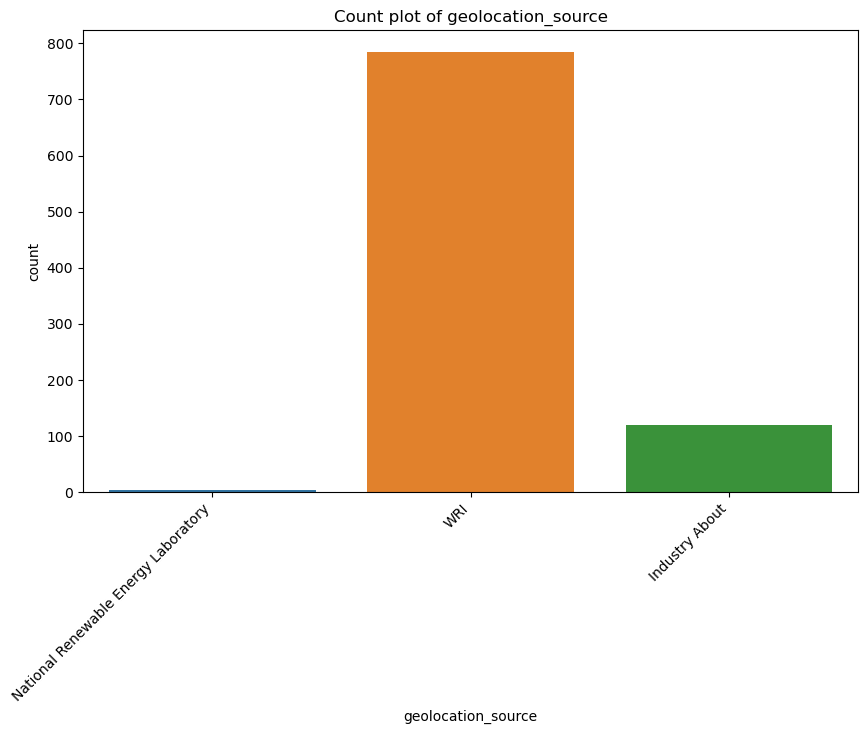

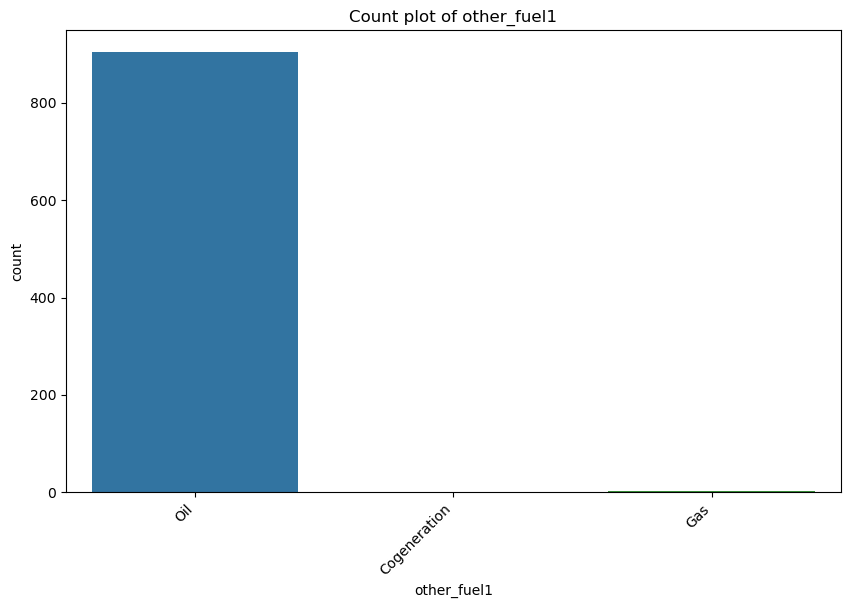

In [130]:
# Plot bar plots for categorical variables
categorical_cols = ['primary_fuel', 'geolocation_source','other_fuel1']
for column in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Count plot of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

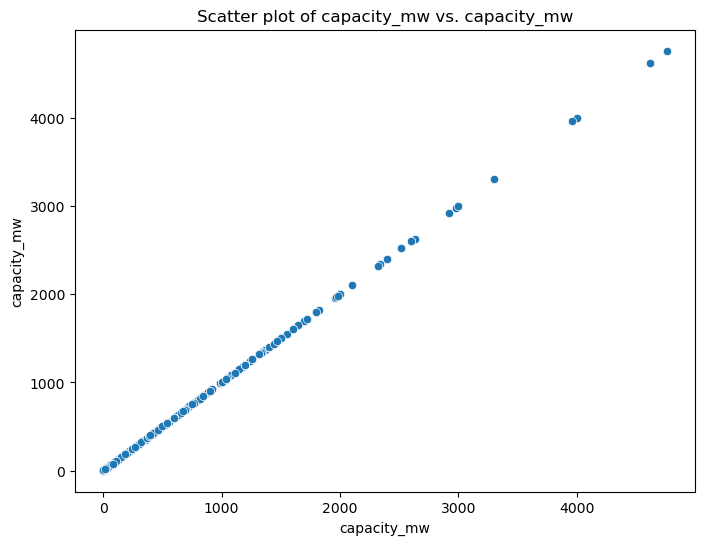

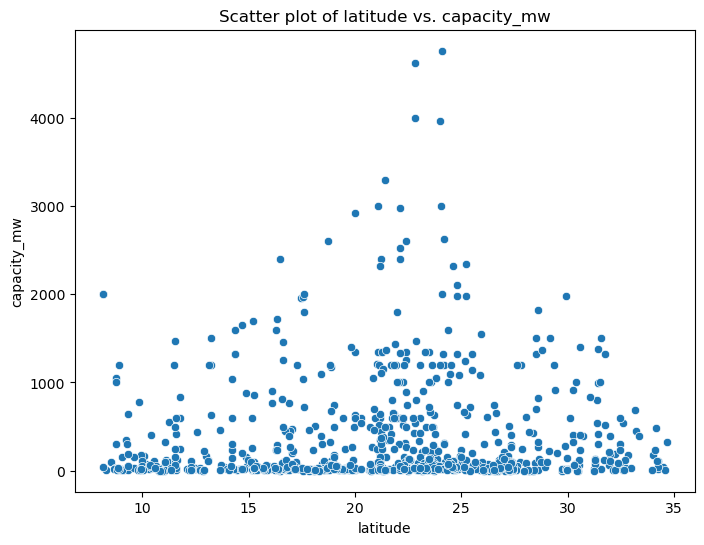

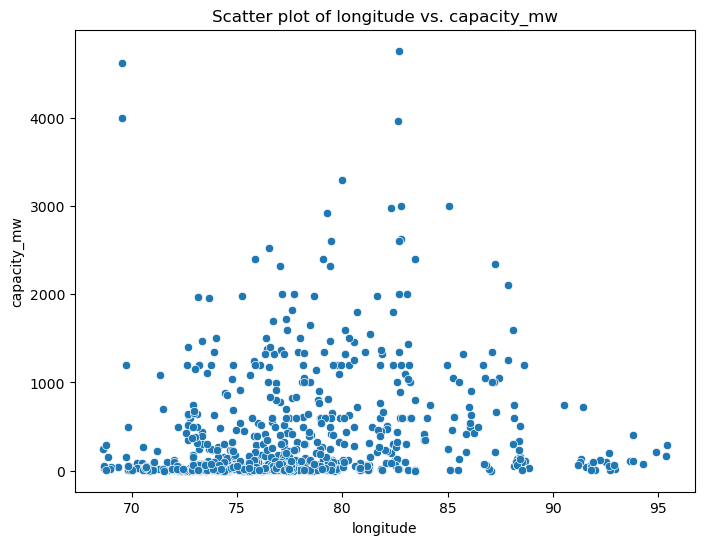

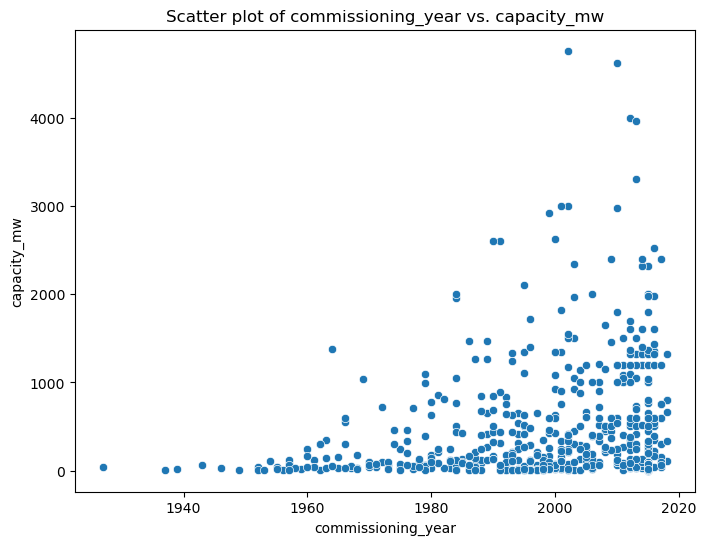

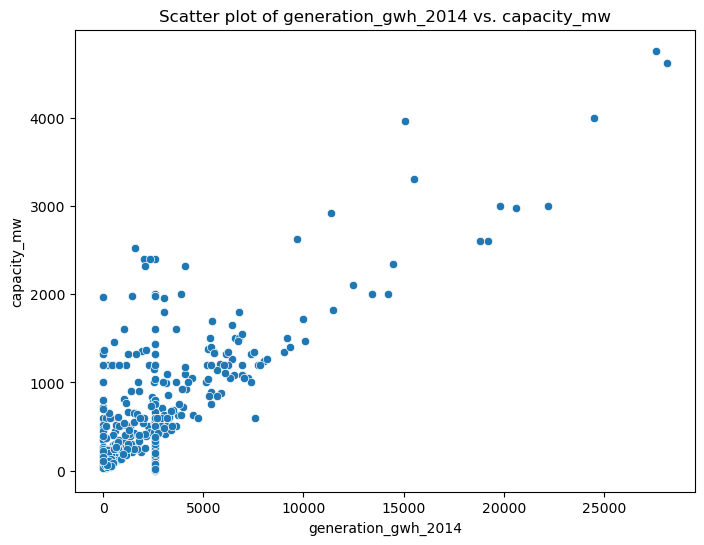

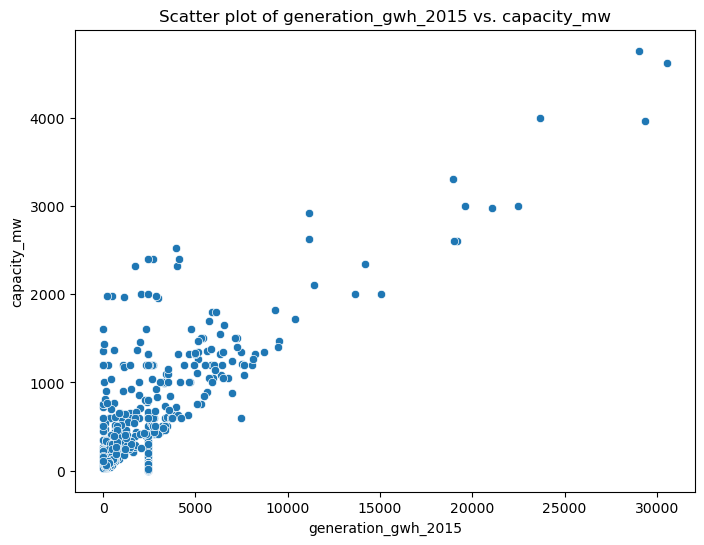

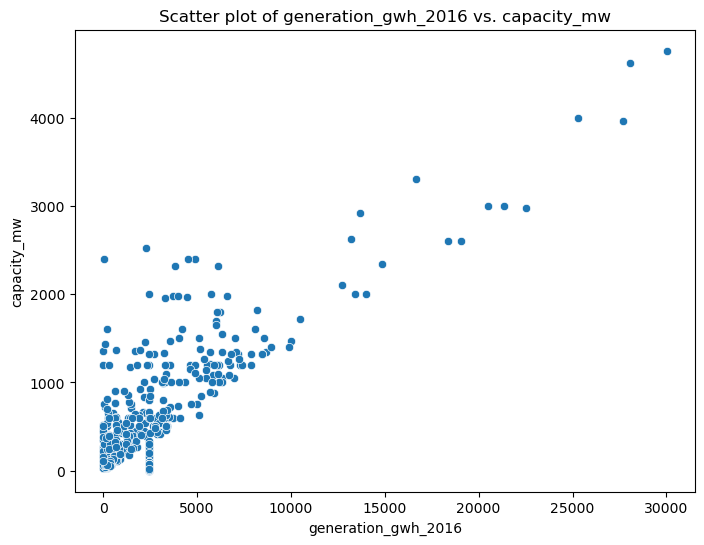

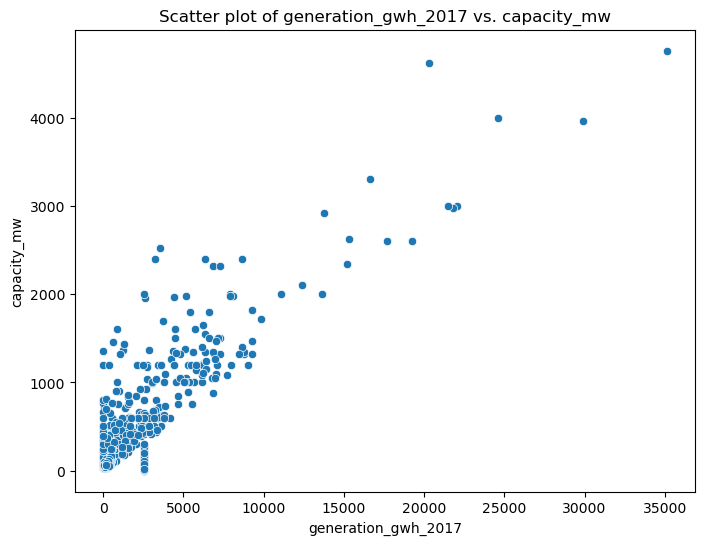

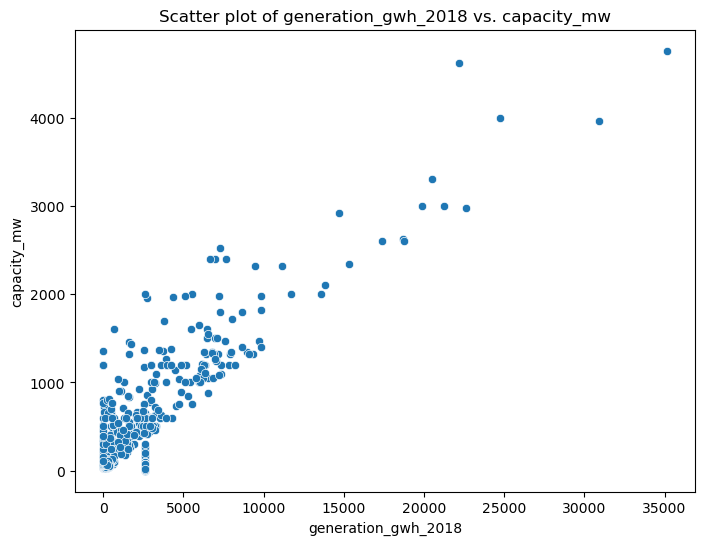

In [131]:
# Bivariate Analysis
# Scatter plots for numerical variables against the target variable

for column in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=column, y='capacity_mw')
    plt.title(f'Scatter plot of {column} vs. capacity_mw')
    plt.show()

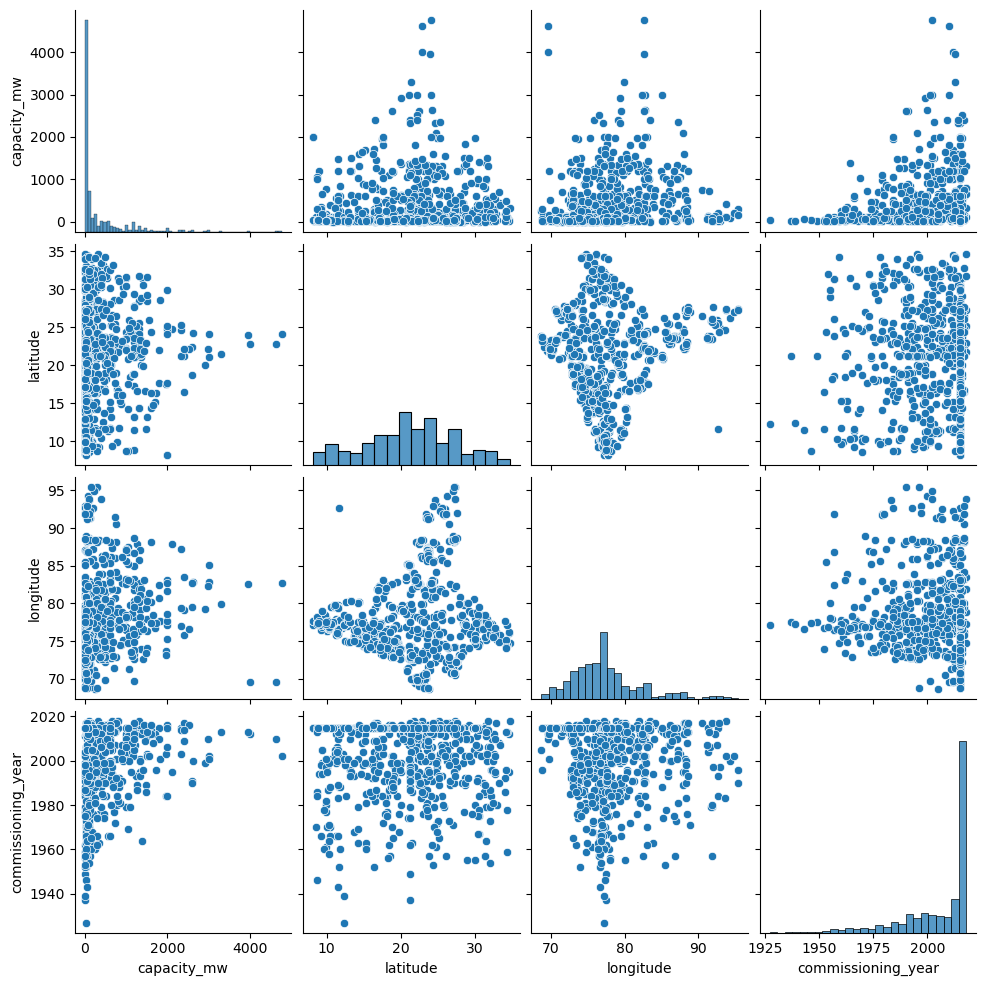

In [132]:
# Pair plot for selected variables
cols = ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']
sns.pairplot(df[cols])
plt.show()

In [133]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,2004.594267,2526.653887,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,15.734928,2666.658835,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,2014.000000,2600.804099,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2015.000000,2600.804099,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


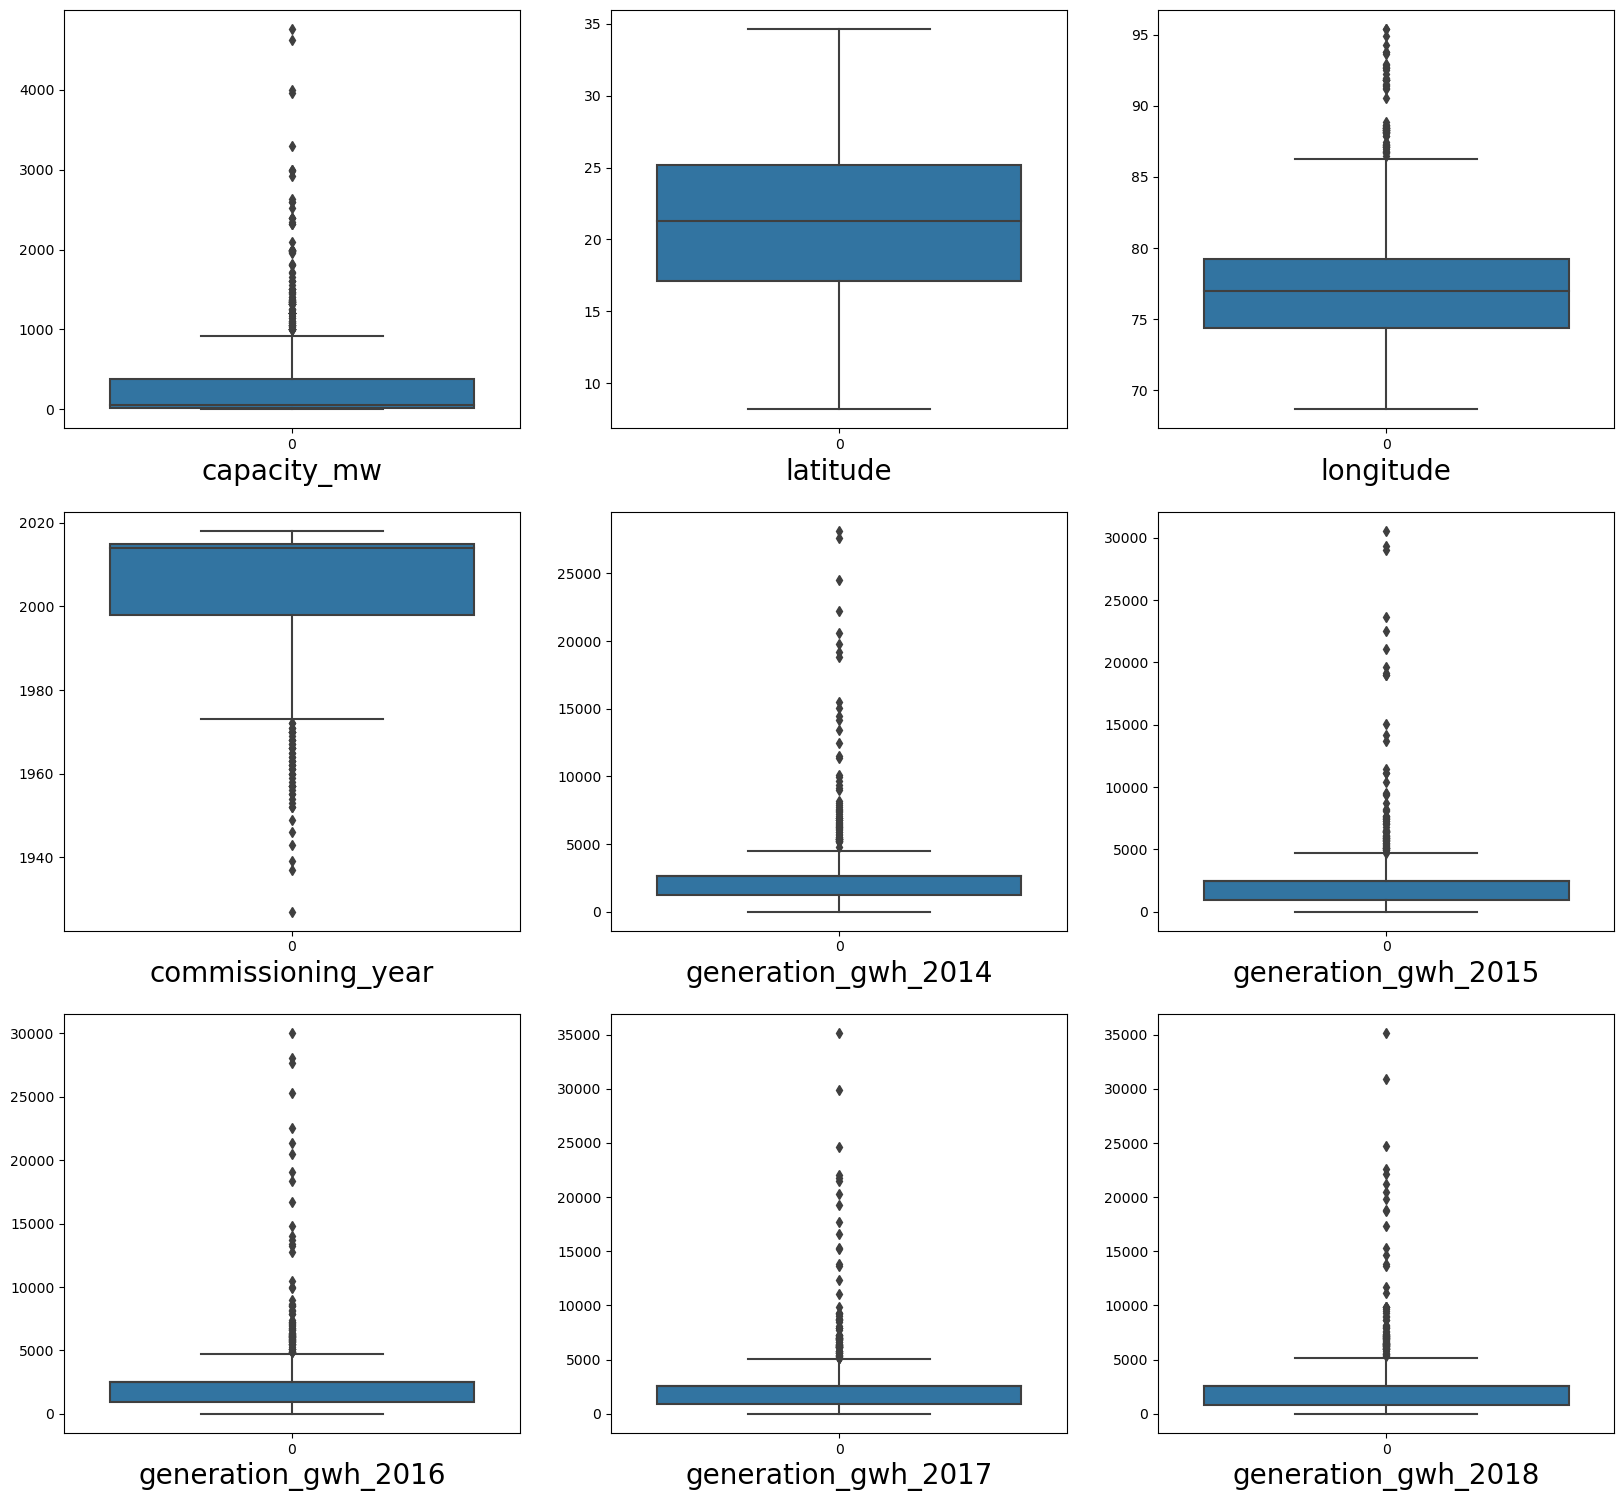

In [134]:
# Visualizing the outliers using boxplot
plt.figure(figsize=(20,25))
graph = 1

for column in numerical_cols:
    if graph<=13: 
        plt.subplot (4,3,graph) 
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=20)
    
    graph+=1
plt.show()

There are outliers in almost each numerical column. Huge variation is practically possible in all the columns so no need to remove outliers here.

In [135]:
cor=df.corr()
cor

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.004072,0.680029,0.711190,0.742221,0.757585,0.773456
latitude,0.050984,1.000000,0.036362,0.034519,0.042547,0.036398,0.031256,0.031212,0.031326
longitude,0.195882,0.036362,1.000000,-0.159025,0.001327,0.018818,0.039209,0.039675,0.037780
commissioning_year,-0.004072,0.034519,-0.159025,1.000000,0.124817,0.121882,0.141161,0.141343,0.144249
generation_gwh_2014,0.680029,0.042547,0.001327,0.124817,1.000000,0.951924,0.924350,0.890154,0.883482
generation_gwh_2015,0.711190,0.036398,0.018818,0.121882,0.951924,1.000000,0.968888,0.928242,0.923461
generation_gwh_2016,0.742221,0.031256,0.039209,0.141161,0.924350,0.968888,1.000000,0.964649,0.957159
generation_gwh_2017,0.757585,0.031212,0.039675,0.141343,0.890154,0.928242,0.964649,1.000000,0.982689
generation_gwh_2018,0.773456,0.031326,0.037780,0.144249,0.883482,0.923461,0.957159,0.982689,1.000000


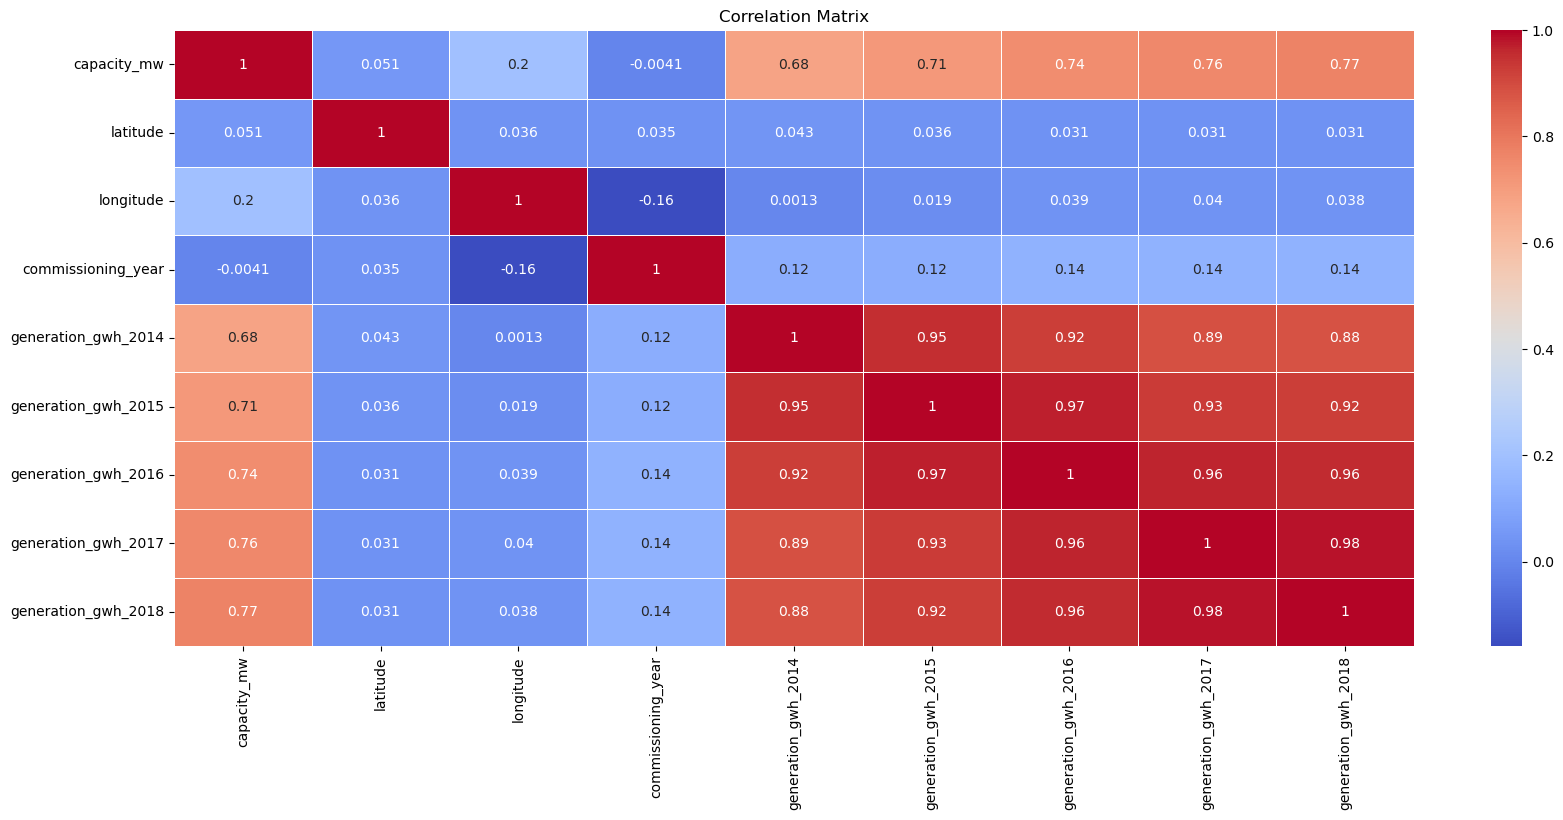

In [136]:
# visualizing the correlation matrix using a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [137]:
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()

cols = ['primary_fuel', 'geolocation_source', 'source','other_fuel1']

for col in cols:
    df[col] = OE.fit_transform(df[col].values.reshape(-1, 1))
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,2.0,2011,109.0,1.0,2600.804099,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1.0,2.0,2015,174.0,2.0,2600.804099,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7.0,2.0,2015,21.0,2.0,2600.804099,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2.0,2.0,2004,22.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1.0,2.0,2015,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1.0,2.0,2016,22.0,2.0,2600.804099,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6.0,2.0,2015,77.0,0.0,2600.804099,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7.0,2.0,2015,21.0,2.0,2600.804099,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1.0,2.0,2015,59.0,2.0,2600.804099,2428.226946,2467.936859,2547.759305,2600.804099


we have 2 Tasks: One of Classification and other of Regression

we will start with Classification where target variable will be 'primary_fuel'.

In [138]:
x1 = df.drop('primary_fuel',axis=1)
y1 = df['primary_fuel']

In [139]:
# standardizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x1= pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)
x1

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.548908,1.149805,-0.878280,0.054303,0.407327,1.460215,-1.083349,0.027822,0.000000,0.000000,-1.557412e-16,1.501244e-16
1,-0.386977,0.587311,-0.593788,0.054303,0.661679,2.917019,0.394241,0.027822,0.000000,0.000000,-1.557412e-16,1.501244e-16
2,-0.486679,0.116179,-1.682394,0.054303,0.661679,-0.512075,0.394241,0.027822,0.000000,0.000000,-1.557412e-16,1.501244e-16
3,-0.324240,0.439989,2.889052,0.054303,-0.037788,-0.489662,0.394241,-0.716221,-0.554446,-0.549988,-6.452243e-01,-6.518573e-01
4,2.498942,0.125479,1.027976,0.054303,0.661679,-0.489662,0.394241,0.190942,1.220581,1.312471,9.718925e-01,1.544399e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
902,2.159821,-0.806975,-0.022477,0.054303,0.725267,-0.489662,0.394241,0.027822,-0.849344,-0.776810,-5.761719e-01,-6.319636e-01
903,-0.548060,-1.366853,0.145644,0.054303,0.661679,0.743019,-2.560940,0.027822,0.000000,0.000000,-1.557412e-16,1.501244e-16
904,-0.509909,-0.974707,-0.391673,0.054303,0.661679,-0.512075,0.394241,0.027822,0.000000,0.000000,-1.557412e-16,1.501244e-16
905,-0.417498,0.518793,-0.772866,0.054303,0.661679,0.339596,0.394241,0.027822,0.000000,0.000000,-1.557412e-16,1.501244e-16


In [140]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x1.columns
vif_data["VIF"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]

print(vif_data)

               Variable        VIF
0           capacity_mw   3.126590
1              latitude   1.056531
2             longitude   1.145484
3           other_fuel1   1.015435
4    commissioning_year   1.176811
5                source   1.523694
6    geolocation_source   1.478730
7   generation_gwh_2014  10.764260
8   generation_gwh_2015  25.912423
9   generation_gwh_2016  33.545365
10  generation_gwh_2017  37.183934
11  generation_gwh_2018  32.725619


In [142]:
x1=x1.drop('generation_gwh_2017',axis=1)

In [143]:
# Checking for multicollinearity again
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x1.columns
vif_data["VIF"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]

print(vif_data)

               Variable        VIF
0           capacity_mw   3.121188
1              latitude   1.056476
2             longitude   1.145250
3           other_fuel1   1.008453
4    commissioning_year   1.176644
5                source   1.523632
6    geolocation_source   1.478700
7   generation_gwh_2014  10.731218
8   generation_gwh_2015  25.622161
9   generation_gwh_2016  29.033527
10  generation_gwh_2018  13.742114


In [144]:
x1=x1.drop('generation_gwh_2016',axis=1)

In [145]:
# Checking for multicollinearity again
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x1.columns
vif_data["VIF"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]

print(vif_data)

              Variable        VIF
0          capacity_mw   3.118893
1             latitude   1.055825
2            longitude   1.139597
3          other_fuel1   1.008451
4   commissioning_year   1.172075
5               source   1.523630
6   geolocation_source   1.478476
7  generation_gwh_2014  10.730883
8  generation_gwh_2015  15.953550
9  generation_gwh_2018   8.809670


We have removed multicollinearity till some extent. Now we will move ahead so that we do not lose much data that can be a help in predictive model.

In [146]:
# Checking for best random state and accuracy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

best_RS = None
best_accuracy = 0.0

for i in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=i)
    model = DecisionTreeClassifier()

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_RS = i

print(f'Best Random State: {best_RS}')
print(f'Best Accuracy: {best_accuracy:.2f}')


Best Random State: 77
Best Accuracy: 0.87


In [148]:
#splitting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = best_RS)

In [149]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score 
from sklearn.model_selection import cross_val_score

In [151]:
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier()
]

for model in models:
    model_name = model.__class__.__name__
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Cross-validation
    score = cross_val_score(model, x1, y1, cv=5, scoring="accuracy")
    
    # Printing results
    print(f"Results for {model_name}:")
    print('Accuracy: ', accuracy)
    print('Classification Report:\n', classification_rep)
    print('Confusion Matrix:\n', conf_matrix)
    
    # Cross-validating scores
    print("Cross-validation scores:", score)
    print("Mean Cross-validation score:", score.mean())
    print("Difference between Accuracy and cross-validation score is", (accuracy - score.mean()) * 100)
    
    print("\n" + "="*40 + "\n")


Results for LogisticRegression:
Accuracy:  0.7655677655677655
Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.50      0.56        20
         1.0       0.75      0.72      0.74        79
         2.0       0.30      0.23      0.26        13
         3.0       0.75      0.85      0.80        82
         4.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         5
         6.0       1.00      0.96      0.98        28
         7.0       0.84      1.00      0.91        42

    accuracy                           0.77       273
   macro avg       0.53      0.53      0.53       273
weighted avg       0.73      0.77      0.75       273

Confusion Matrix:
 [[10  6  0  0  0  0  0  4]
 [ 4 57  3 11  0  1  0  3]
 [ 1  3  3  6  0  0  0  0]
 [ 0  8  3 70  0  0  0  1]
 [ 0  1  0  3  0  0  0  0]
 [ 1  0  1  3  0  0  0  0]
 [ 0  1  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 42]]
Cross-validation scores: [0

The RandomForestClassifier has the highest accuracy and had the small difference between accuracy and cross-validation score. Therefore, the RandomForestClassifier is the best model.

#### Hyper parameter tunning

In [152]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='accuracy')


In [153]:
# Fittng the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [154]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [155]:
best_model = grid_search.best_estimator_

# Making predictions on the test set using the best model
pred = best_model.predict(x_test)

# Evaluating the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.75      0.77        20
         1.0       0.85      0.87      0.86        79
         2.0       0.43      0.46      0.44        13
         3.0       0.89      0.94      0.91        82
         4.0       0.00      0.00      0.00         4
         5.0       0.50      0.20      0.29         5
         6.0       1.00      1.00      1.00        28
         7.0       1.00      1.00      1.00        42

    accuracy                           0.87       273
   macro avg       0.68      0.65      0.66       273
weighted avg       0.86      0.87      0.86       273

Confusion Matrix:
 [[15  5  0  0  0  0  0  0]
 [ 4 69  3  2  0  1  0  0]
 [ 0  2  6  5  0  0  0  0]
 [ 0  4  1 77  0  0  0  0]
 [ 0  1  1  2  0  0  0  0]
 [ 0  0  3  1  0  1  0  0]
 [ 0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0 42]]


In [156]:
#Saving the model using .pkl
import joblib
joblib.dump(best_model, "Primary_fuel.pkl")

['Primary_fuel.pkl']

In [159]:
# loading the saved model and get the predictions
model=joblib.load("Primary_fuel.pkl")

# Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
df4 = pd.DataFrame()
df4["Predicted"] = prediction
df4["Original"] = a
df4

,Predicted,Original
0,3.0,3.0
1,7.0,7.0
2,3.0,3.0
3,7.0,7.0
4,1.0,1.0
...,...,...
268,1.0,1.0
269,1.0,1.0
270,2.0,2.0
271,3.0,3.0


We have completed classification problem where label was Primary fuel. Now we will move ahead to solve regression problem where target variable is capacity_mw.

In [160]:
x2 = df.drop('capacity_mw',axis=1)
y2 = df['capacity_mw']

In [161]:
# standardizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x2= pd.DataFrame(scaler.fit_transform(x2), columns = x2.columns)
x2

,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.149805,-0.878280,1.225688,0.054303,0.407327,1.460215,-1.083349,0.027822,0.000000,0.000000,-1.557412e-16,1.501244e-16
1,0.587311,-0.593788,-0.967877,0.054303,0.661679,2.917019,0.394241,0.027822,0.000000,0.000000,-1.557412e-16,1.501244e-16
2,0.116179,-1.682394,1.664401,0.054303,0.661679,-0.512075,0.394241,0.027822,0.000000,0.000000,-1.557412e-16,1.501244e-16
3,0.439989,2.889052,-0.529164,0.054303,-0.037788,-0.489662,0.394241,-0.716221,-0.554446,-0.549988,-6.452243e-01,-6.518573e-01
4,0.125479,1.027976,-0.967877,0.054303,0.661679,-0.489662,0.394241,0.190942,1.220581,1.312471,9.718925e-01,1.544399e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
902,-0.806975,-0.022477,-0.967877,0.054303,0.725267,-0.489662,0.394241,0.027822,-0.849344,-0.776810,-5.761719e-01,-6.319636e-01
903,-1.366853,0.145644,1.225688,0.054303,0.661679,0.743019,-2.560940,0.027822,0.000000,0.000000,-1.557412e-16,1.501244e-16
904,-0.974707,-0.391673,1.664401,0.054303,0.661679,-0.512075,0.394241,0.027822,0.000000,0.000000,-1.557412e-16,1.501244e-16
905,0.518793,-0.772866,-0.967877,0.054303,0.661679,0.339596,0.394241,0.027822,0.000000,0.000000,-1.557412e-16,1.501244e-16


In [162]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x2.columns
vif_data["VIF"] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]

print(vif_data)

               Variable        VIF
0              latitude   1.060339
1             longitude   1.224165
2          primary_fuel   1.628742
3           other_fuel1   1.013969
4    commissioning_year   1.192268
5                source   1.613780
6    geolocation_source   1.979687
7   generation_gwh_2014  10.756725
8   generation_gwh_2015  25.869814
9   generation_gwh_2016  33.490726
10  generation_gwh_2017  37.142557
11  generation_gwh_2018  30.547267


In [163]:
x2= x2.drop('generation_gwh_2017',axis=1)

In [164]:
# Checking for multicollinearity again
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x2.columns
vif_data["VIF"] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]

print(vif_data)

               Variable        VIF
0              latitude   1.060299
1             longitude   1.223899
2          primary_fuel   1.627739
3           other_fuel1   1.007198
4    commissioning_year   1.192059
5                source   1.613572
6    geolocation_source   1.979429
7   generation_gwh_2014  10.725113
8   generation_gwh_2015  25.589370
9   generation_gwh_2016  29.013533
10  generation_gwh_2018  12.021307


In [165]:
x2 = x2.drop('generation_gwh_2016',axis=1)

In [166]:
# Checking for multicollinearity again
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x2.columns
vif_data["VIF"] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]

print(vif_data)

              Variable        VIF
0             latitude   1.059804
1            longitude   1.217161
2         primary_fuel   1.627663
3          other_fuel1   1.007198
4   commissioning_year   1.187753
5               source   1.613559
6   geolocation_source   1.979402
7  generation_gwh_2014  10.724698
8  generation_gwh_2015  15.943647
9  generation_gwh_2018   6.918559


In [167]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [168]:
best_RS = None
max_acc = 0
for random_state in range(1, 101): 
    x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=random_state)

    model = LinearRegression()
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    accuracy = r2_score(y_test, predictions)

    if accuracy > max_acc:
        max_acc = accuracy
        best_RS = random_state

print(f'Best Random State: {best_RS}')
print(f'Maximum Accuracy: {max_acc}')

Best Random State: 92
Maximum Accuracy: 0.8456274836008555


In [169]:
x_train,x_test,y_train,y_test = train_test_split(x2, y2, test_size = 0.30, random_state =best_RS)

In [170]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN 
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

In [171]:
models = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNN(),
    Lasso(),
    Ridge()
]

for model in models:
    model_name = model.__class__.__name__
    
    # Fitting the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    # Evaluation
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train) * 100
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Cross-validation
    score = cross_val_score(model, x2, y2, cv=5, scoring="r2")
    
    # Printing results
    print(f"Results for {model_name}:")
    print('R2_score: ', r2_test)
    print('R2_score on training Data:', r2_train)
    print('Mean Absolute Error:-', mae)
    print('Mean Squared Error:-', mse)
    print("Root Mean Squared Error:-", rmse)
    
     # Cross-validation scores
    print("Cross-validation scores:", score)
    print("Mean Cross-validation score:", score.mean())
    print("Difference between R2 score and cross-validation score is", (r2_test - score.mean()) * 100)
   
    
    print("\n" + "="*40 + "\n")

Results for LinearRegression:
R2_score:  0.821306230865297
R2_score on training Data: 64.05821989618762
Mean Absolute Error:- 205.04916144549875
Mean Squared Error:- 95021.9739444582
Root Mean Squared Error:- 308.25634453236836
Cross-validation scores: [0.62886206 0.60983248 0.7065308  0.73399584 0.79614806]
Mean Cross-validation score: 0.6950738487197937
Difference between R2 score and cross-validation score is 12.623238214550325


Results for RandomForestRegressor:
R2_score:  0.8723118129034217
R2_score on training Data: 97.22889686278779
Mean Absolute Error:- 126.1056697747325
Mean Squared Error:- 67899.3097860056
Root Mean Squared Error:- 260.5749600134395
Cross-validation scores: [0.84219545 0.84794908 0.83708264 0.85253851 0.88064383]
Mean Cross-validation score: 0.8520819020740124
Difference between R2 score and cross-validation score is 2.022991082940939


Results for DecisionTreeRegressor:
R2_score:  0.7618444844576389
R2_score on training Data: 99.99108763726483
Mean Absolute

Random Forest Regressor is the best model for this dataset. It has the highest R2 score, the lowest MAE, and a relatively low RMSE. Additionally, the cross-validation score is reasonable, indicating good generalization performance.

In [172]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [173]:
# Initializing GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(), params, cv=5, scoring='accuracy')


In [174]:
# Fittng the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [175]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [176]:
best_model = grid_search.best_estimator_

# Making predictions on the test set using the best model
pred = best_model.predict(x_test)

print("R2_score: ",r2_score (y_test, pred))
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred)) 
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-", np.sqrt(mean_squared_error(y_test, pred)))

R2_score:  0.870713624731464
Mean Absolute Error:- 125.34551088500329
Mean Squared Error:- 68749.16031839674
Root Mean Squared Error:- 262.20061082765756


In [177]:
import joblib
joblib.dump(best_model, "capacity_mw.pkl")

['capacity_mw.pkl']

In [178]:
# loading the saved model and get the predictions
model=joblib.load("capacity_mw.pkl")

# Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
df4 = pd.DataFrame()
df4["Predicted"] = prediction
df4["Original"] = a
df4

,Predicted,Original
0,56.0492,66.0
1,39.5340,30.6
2,75.5180,120.0
3,33.9420,30.0
4,1344.6000,1110.0
...,...,...
268,45.2290,1.5
269,888.1240,726.6
270,27.8700,34.4
271,115.6130,115.0
